# Secant method

Natasha Watkins

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def secant_method(x0, x1, f, f_prime, ɛ=1e-6, max_iter=100):
    
    x = np.zeros(max_iter)  # Store x's
    x[0] = x0
    x[1] = x1
    f_primes = np.zeros(max_iter)  # Store f_primes
    f_primes[0] = f_prime(x0)
    
    diff = 1e3  # Initialise distance
    i = 1  # Initialise iteration from 1 (x0 already calculated)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    x_grid = np.linspace(0, 3)
    ax.plot(x_grid, f(x_grid))
    ax.scatter(x0, f(x0), s=60, edgecolor='k')  # Plot initial guesses
    ax.scatter(x1, f(x1), s=60, edgecolor='k')
    
    ax.annotate('initial guess', xy=(x0, f(x0)), xytext=(x[i], f(x0)+10),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=14)
    
    
    while diff > ɛ and i < max_iter:
        f_primes[i] = f_prime(x[i])
        x[i+1] = x[i] - f_primes[i] * (x[i] - x[i-1])/(f_primes[i] - f_primes[i-1])  # Update x
        ax.scatter(x[i+1], f(x[i+1]), s=60, edgecolor='k')  # Plot iteration
        diff = np.abs(x[i] - x[i-1]) / np.abs(x[i])  # Normalised difference
        i += 1
        
    ax.annotate('critical point', xy=(x[i], f(x[i])), xytext=(x[i], f(x[i])+10),
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=14)
                
    if diff > ɛ:
        print('Did not converge')
    else:
        print(f'Converged in {i} iterations')
        
    return x[i]

In [117]:
f = lambda x: x**4 - 14 * x**3 + 60 * x**2 - 70 * x
f_prime = lambda x: 4 * x**3 - 14 * 3 * x**2 + 120 * x - 70
x0 = 0
x1 = 0.1

Converged in 8 iterations


0.7808840530880756

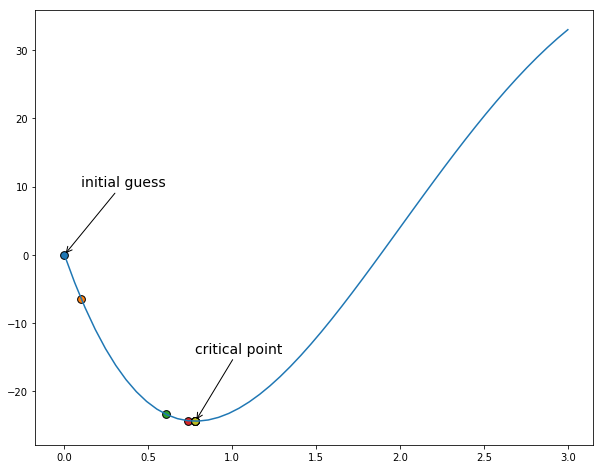

In [118]:
secant_method(x0, x1, f, f_prime)